In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Set the style
sns.set_style("darkgrid")

df = pd.read_csv("stats_2025-10-14_19-12-16.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,timestamp,step,current_temp_c,ambient_temp_c,action,watts_on,spot_price,heating_rate,cooling_coeff,predicted_temp_c,predicted_power,cost_dkk_per_step,cumulative_cost_dkk
0,2025-10-14 19:12:22.176015,0,20.312,12.6,OFF,0.0,3.04140,1.5,0.040000,20.00352,0.0,0.0,0.0
1,2025-10-14 19:27:24.831055,1,20.312,12.6,OFF,0.0,3.04140,1.5,0.040000,20.00352,0.0,0.0,0.0
2,2025-10-14 19:42:27.038115,2,20.000,12.6,ON,0.0,3.04140,1.5,0.030000,21.27800,0.0,0.0,0.0
3,2025-10-14 19:57:29.343350,3,20.250,12.6,OFF,0.0,3.04140,0.5,0.030000,20.02050,0.0,0.0,0.0
4,2025-10-14 20:12:31.699581,4,20.187,11.9,OFF,0.0,1.68406,0.5,0.017707,20.04026,0.0,0.0,0.0


Total cost: 3.15716936325 DKK
Average spot price 1.1862039759036143 DKK


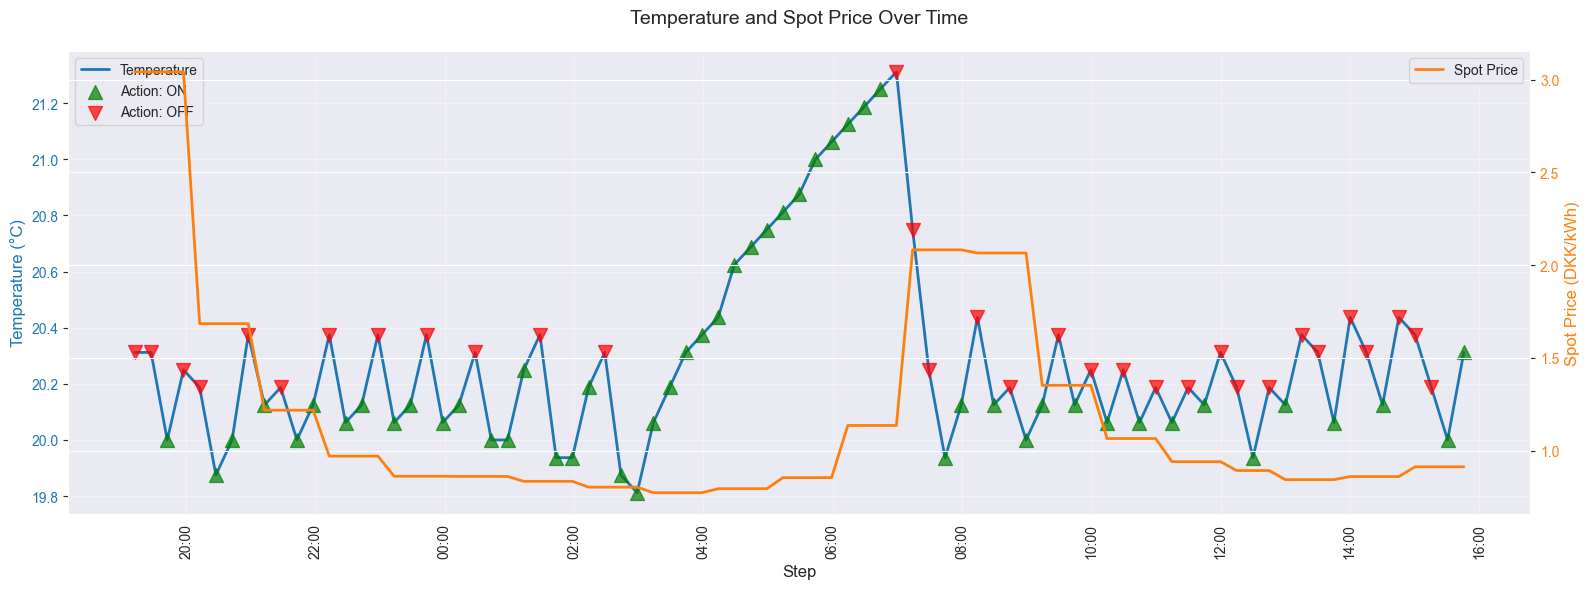

In [2]:
fig, ax1 = plt.subplots(figsize=(16, 6))

# Plot temperature on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Step', fontsize=12)
ax1.set_ylabel('Temperature (°C)', color=color, fontsize=12)
ax1.plot(df['timestamp'], df['current_temp_c'], color=color, linewidth=2, label='Temperature')
ax1.tick_params(axis='y', labelcolor=color)

# Add triangle indicators for ON/OFF actions
df_on = df[df['action'] == 'ON']
df_off = df[df['action'] == 'OFF']

ax1.scatter(df_on['timestamp'], df_on['current_temp_c'], marker='^', s=100, 
            color='green', alpha=0.7, label='Action: ON', zorder=5)
ax1.scatter(df_off['timestamp'], df_off['current_temp_c'], marker='v', s=100, 
            color='red', alpha=0.7, label='Action: OFF', zorder=5)

# Format x-axis to show time in 24h format (HH:MM) and rotate labels
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax1.tick_params(axis='x', rotation=90)

# Create a second y-axis for spot price on the right
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Spot Price (DKK/kWh)', color=color, fontsize=12)
ax2.plot(df['timestamp'], df['spot_price'], color=color, linewidth=2, label='Spot Price')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and grid
plt.title('Temperature and Spot Price Over Time', fontsize=14, pad=20)
ax1.grid(True, alpha=0.3)

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

print(f"Total cost: {df['cost_dkk_per_step'].sum()} DKK")
print(f"Average spot price {df['spot_price'].mean()} DKK")

fig.tight_layout()
plt.show()

In [3]:
df = pd.read_csv("stats_2025-10-15_16-59-11.csv")
df['datetime'] = pd.to_datetime(df['datetime'])


df.head()

,step,datetime,action,watts_on,current_temp_c,ambient_temp_c,current_spot_price_eur_kwh,heating_rate_k_per_step,cooling_coefficient,predicted_next_temp_c,predicted_cost_eur,fcr_revenue_eur,fcr_d_down_price_eur,fcr_d_up_price_eur
0,0,2025-10-15 16:59:16.494927,ON,450.8,21.125,12.6,0.13657,0.5,0.020000,21.454500,0.017071,0.000431,0.003448,0.004868
1,1,2025-10-15 17:14:19.068344,OFF,0.0,21.187,12.8,0.16988,0.5,0.020000,21.019260,0.000000,0.000549,0.003448,0.004868
2,2,2025-10-15 17:29:21.632339,OFF,0.0,21.000,12.8,0.16988,0.5,0.022296,20.817172,0.000000,0.000000,0.003448,0.004868
3,3,2025-10-15 17:44:23.987140,OFF,0.0,20.687,12.8,0.16988,0.5,0.030000,20.450390,0.000000,0.000000,0.003448,0.004868
4,4,2025-10-15 17:59:27.458535,OFF,0.0,20.437,12.8,0.16988,0.5,0.030000,20.207890,0.000000,0.000000,0.003448,0.004868


Total cost: 0.1670450129999998 EUR
Average spot price 0.11524753246753247 EUR


/var/folders/fh/lmktpsyd2f99h77_8mhvt4xw0000gn/T/ipykernel_58200/3325707676.py:25: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax2.grid(False, alpha=0.0)


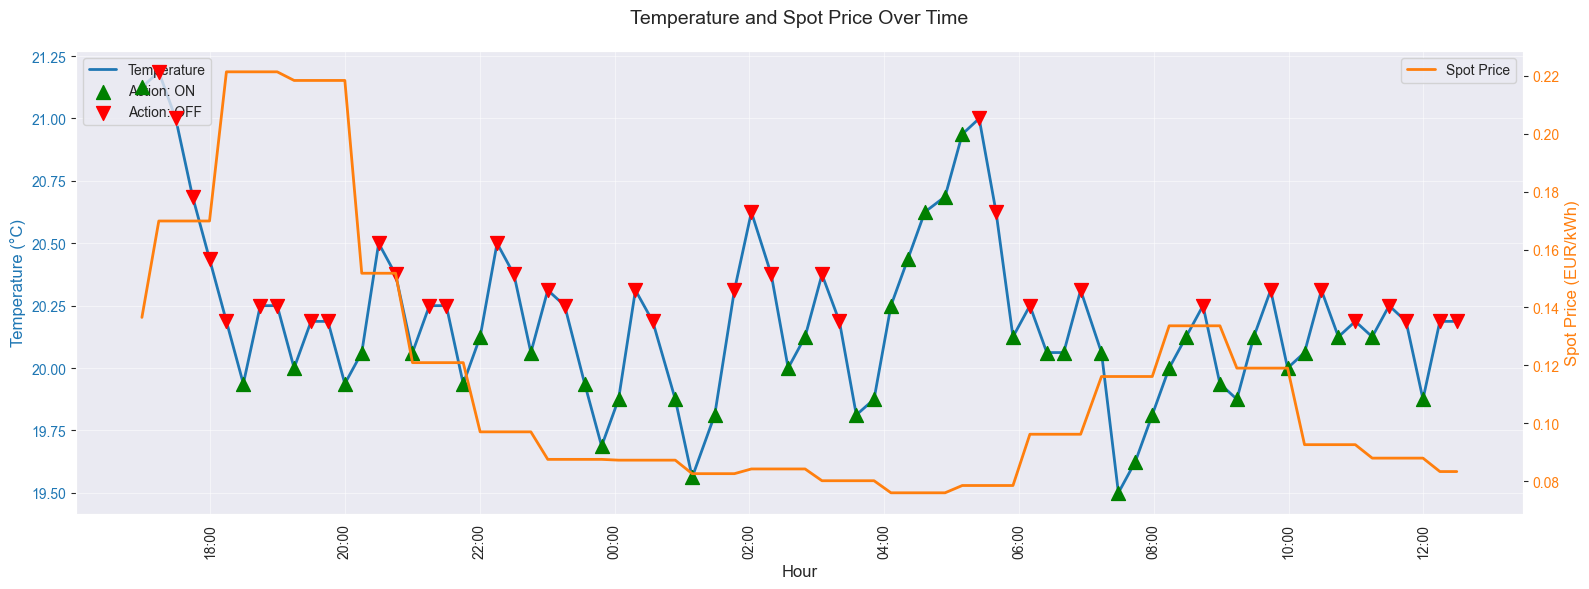

In [4]:
fig, ax1 = plt.subplots(figsize=(16, 6))

# Plot temperature on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Hour', fontsize=12)
ax1.set_ylabel('Temperature (°C)', color=color, fontsize=12)
ax1.plot(df['datetime'], df['current_temp_c'], color=color, linewidth=2, label='Temperature')
ax1.tick_params(axis='y', labelcolor=color)

# Add triangle indicators for ON/OFF actions
df_on = df[df['action'] == 'ON']
df_off = df[df['action'] == 'OFF']

ax1.scatter(df_on['datetime'], df_on['current_temp_c'], marker='^', s=100, 
            color='green', alpha=1, label='Action: ON', zorder=999)
ax1.scatter(df_off['datetime'], df_off['current_temp_c'], marker='v', s=100, 
            color='red', alpha=1, label='Action: OFF', zorder=999)

# Create a second y-axis for spot price on the right
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Spot Price (EUR/kWh)', color=color, fontsize=12)
ax2.plot(df['datetime'], df['current_spot_price_eur_kwh'], color=color, linewidth=2, label='Spot Price')
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False, alpha=0.0)

# Format x-axis to show time in 24h format (HH:MM) and rotate labels
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax1.tick_params(axis='x', rotation=90)

# Add title and grid
plt.title('Temperature and Spot Price Over Time', fontsize=14, pad=20)
ax1.grid(True, alpha=0.5)

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()

# Total price: 
print(f"Total cost: {df['predicted_cost_eur'].sum()} EUR")
print(f"Average spot price {df['current_spot_price_eur_kwh'].mean()} EUR")

plt.show()

/var/folders/fh/lmktpsyd2f99h77_8mhvt4xw0000gn/T/ipykernel_58200/1925344642.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


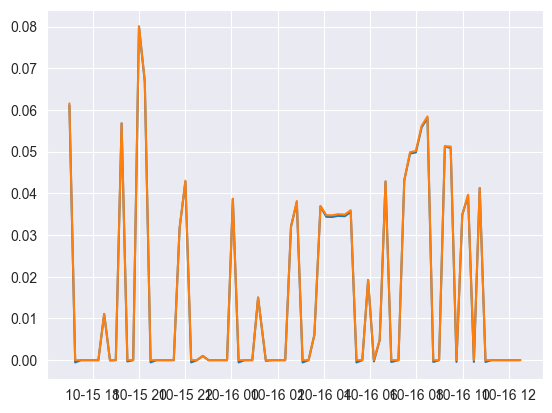

In [5]:
df_cost = df.copy()
df_cost['net_cost'] = ((df_cost['watts_on'] / 1_000) * df_cost['current_spot_price_eur_kwh']) - df['fcr_revenue_eur']

fig = plt.figure()
x = df_cost['datetime']

plt.plot(x, df_cost['net_cost'])
plt.plot(x, ((df_cost['watts_on'] / 1_000) * df_cost['current_spot_price_eur_kwh']))
fig.show()

/var/folders/fh/lmktpsyd2f99h77_8mhvt4xw0000gn/T/ipykernel_58200/721258152.py:27: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax2.grid(False, alpha=0.0)


Total cost: 0.3414358539999993 EUR
Average spot price 0.1033932558139535 EUR


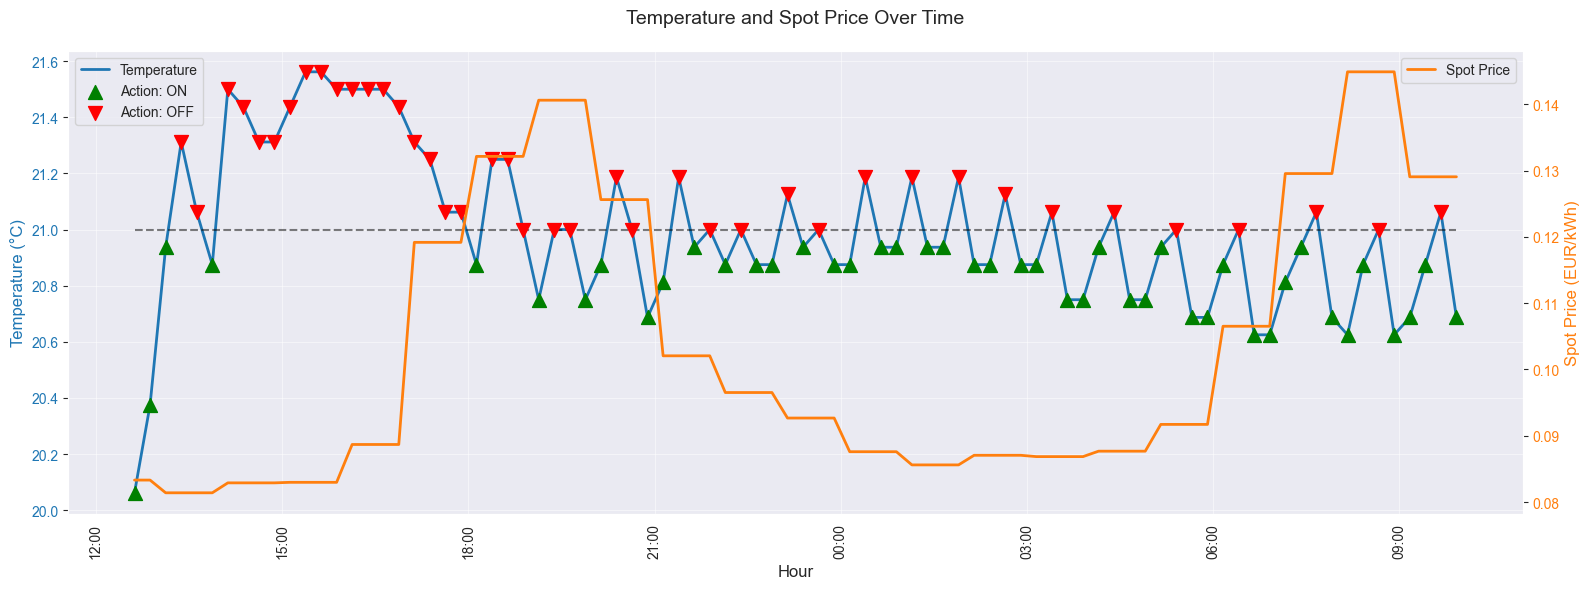

In [6]:
df_hys = pd.read_csv('stats_2025-10-16_12-37-18.csv')
df_hys['datetime'] = pd.to_datetime(df_hys['datetime'])
fig, ax1 = plt.subplots(figsize=(16, 6))

# Plot temperature on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Hour', fontsize=12)
ax1.set_ylabel('Temperature (°C)', color=color, fontsize=12)
ax1.plot(df_hys['datetime'], df_hys['current_temp_c'], color=color, linewidth=2, label='Temperature')
ax1.tick_params(axis='y', labelcolor=color)

# Add triangle indicators for ON/OFF actions
df_on = df_hys[df_hys['action'] == 'ON']
df_off = df_hys[df_hys['action'] == 'OFF']

ax1.scatter(df_on['datetime'], df_on['current_temp_c'], marker='^', s=100, 
            color='green', alpha=1, label='Action: ON', zorder=999)
ax1.scatter(df_off['datetime'], df_off['current_temp_c'], marker='v', s=100, 
            color='red', alpha=1, label='Action: OFF', zorder=999)

# Create a second y-axis for spot price on the right
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Spot Price (EUR/kWh)', color=color, fontsize=12)
ax2.plot(df_hys['datetime'], df_hys['current_spot_price_eur_kwh'], color=color, linewidth=2, label='Spot Price')
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False, alpha=0.0)

# Format x-axis to show time in 24h format (HH:MM) and rotate labels
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax1.tick_params(axis='x', rotation=90)

# Add title and grid
plt.title('Temperature and Spot Price Over Time', fontsize=14, pad=20)
ax1.grid(True, alpha=0.5)

ax1.hlines(y=21.0, xmin=df_hys['datetime'].min(), xmax=df_hys['datetime'].max(), color='black', linestyle='--', alpha=0.5)

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()

# Total price: 
print(f"Total cost: {df_hys['predicted_cost_eur'].sum()} EUR")
print(f"Average spot price {df_hys['current_spot_price_eur_kwh'].mean()} EUR")

plt.show()